<a href="https://colab.research.google.com/github/dcthyun0308/ESAA/blob/main/YB_miniproject1_pr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get -qq update
!apt-get -qq -y install fonts-nanum

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 126441 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sns

In [3]:
FONT_PATH = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
fm.fontManager.addfont(FONT_PATH)
nanum = fm.FontProperties(fname=FONT_PATH).get_name()
mpl.rcParams["font.family"] = nanum
mpl.rcParams["font.sans-serif"] = [nanum, "DejaVu Sans"]
mpl.rcParams["axes.unicode_minus"] = False

sns.set_theme(rc={"font.family": nanum, "axes.unicode_minus": False})

In [4]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/movies_train.csv')

Mounted at /content/drive


In [5]:
df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [6]:
df.shape

(600, 12)

In [7]:
df.info() #데이터 타입 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [8]:
df.nunique() #고유값 개수 확인

,0
title,600
distributor,169
genre,12
release_time,330
time,86
screening_rat,4
director,472
dir_prev_bfnum,245
dir_prev_num,6
num_staff,296


In [9]:
print(df.isnull().sum()) #결측치 있는 열 확인

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64


In [10]:
df['dir_prev_bfnum'] = df['dir_prev_bfnum'].fillna(0) #결측치 0으로 채우기
print(df['dir_prev_bfnum'].isnull().sum()) #채우고 결측치 수 다시 확인

0


In [11]:
#이상치 확인
Q1 = df['box_off_num'].quantile(0.25)
Q3 = df['box_off_num'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(df['box_off_num'] < lower) | (df['box_off_num'] > upper)]
out_num = outliers['box_off_num']

print(f'관객수 이상치 개수: {len(out_num)}')

관객수 이상치 개수: 97


In [12]:
#이상치 로그변환
df["box_off_num"] = np.log1p(df["box_off_num"])  # log(x+1) 변환

df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,2,10.060449
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,15.771725
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,15.755558
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,12.291640
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,13.088575


In [13]:
df['release_time'] = pd.to_datetime(df['release_time']) #datetime형으로 변환
print(df.info()) #변환 여부 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           600 non-null    object        
 1   distributor     600 non-null    object        
 2   genre           600 non-null    object        
 3   release_time    600 non-null    datetime64[ns]
 4   time            600 non-null    int64         
 5   screening_rat   600 non-null    object        
 6   director        600 non-null    object        
 7   dir_prev_bfnum  600 non-null    float64       
 8   dir_prev_num    600 non-null    int64         
 9   num_staff       600 non-null    int64         
 10  num_actor       600 non-null    int64         
 11  box_off_num     600 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 56.4+ KB
None


ㄴㄴ

In [14]:
needed = ["genre", "num_staff", "box_off_num"]

df_plot = df[needed].copy()
df_plot["num_staff"] = pd.to_numeric(df_plot["num_staff"], errors="coerce")
df_plot["box_off_num"] = pd.to_numeric(df_plot["box_off_num"], errors="coerce")
df_plot = df_plot.dropna(subset=["genre","num_staff","box_off_num"])

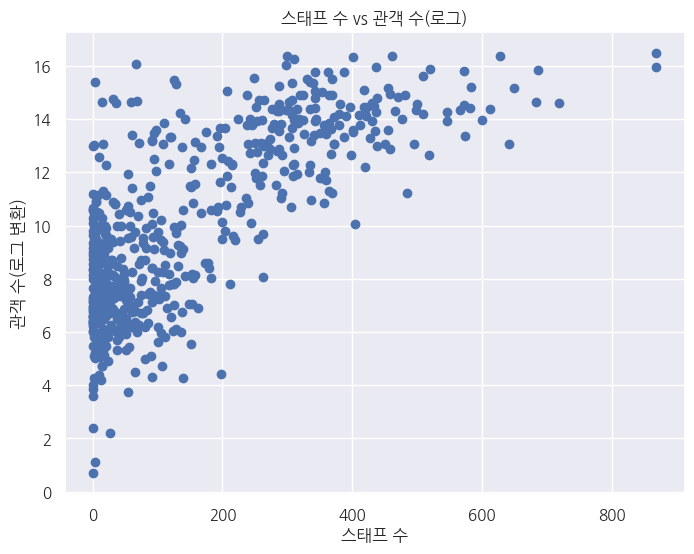

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(
    data=df_plot,
    x="num_staff",
    y="box_off_num",
)
plt.title("스태프 수 vs 관객 수(로그)")
plt.xlabel("스태프 수")
plt.ylabel("관객 수(로그 변환)")
plt.show()

In [30]:
# 스태프 수와 관객 수의 상관계수
tmp = df_plot[['num_staff', 'box_off_num']].dropna()
corr = np.corrcoef(tmp['num_staff'].values, tmp['box_off_num'].values)[0, 1]
print(f'num_staff와 box_off_num 간의 상관계수: {corr}')

num_staff와 box_off_num 간의 상관계수: 0.7450849036972651


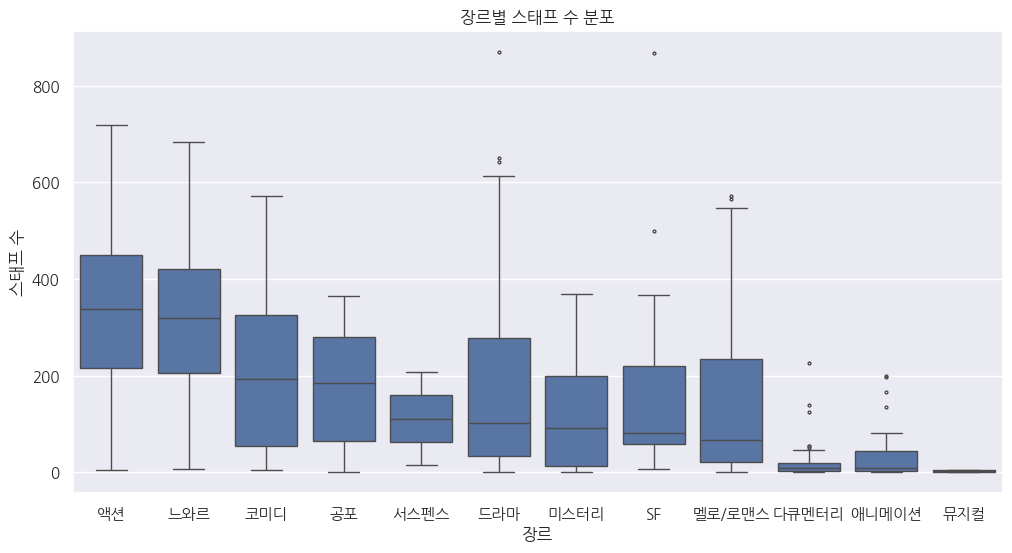

In [18]:
order_med = (df_plot.groupby("genre")["num_staff"]
                      .median()
                      .sort_values(ascending=False)
                      .index)

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_plot,
    x="genre",
    y="num_staff",
    order=order_med,
    fliersize=2
)
plt.title("장르별 스태프 수 분포")
plt.xlabel("장르")
plt.ylabel("스태프 수")
plt.show()

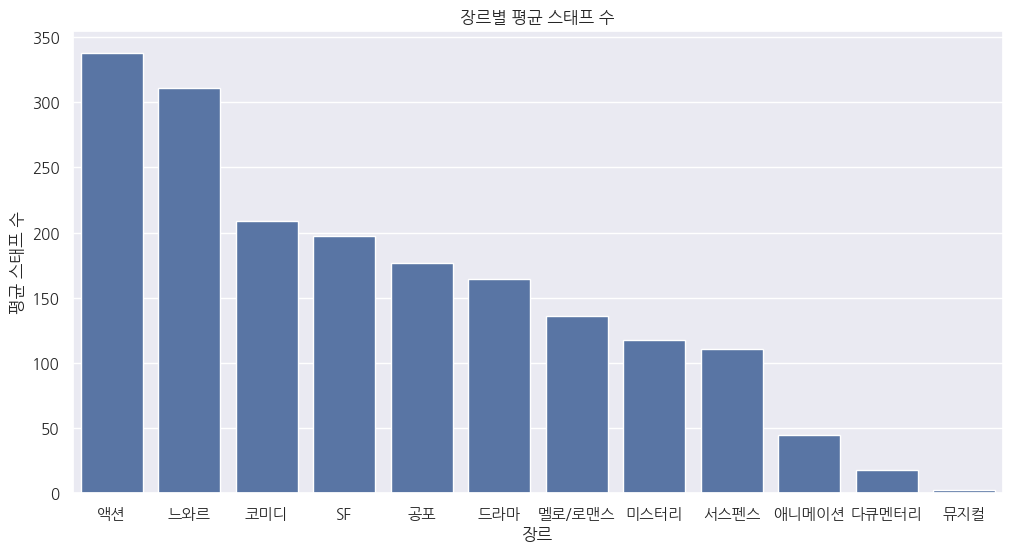

In [19]:
gn_staff = (df_plot.groupby("genre", as_index=False)["num_staff"]
                    .mean()
                    .sort_values("num_staff", ascending=False))

plt.figure(figsize=(12, 6))
sns.barplot(
    data=gn_staff,
    x="genre",
    y="num_staff",
    order=gn_staff["genre"],
)
plt.title("장르별 평균 스태프 수")
plt.xlabel("장르")
plt.ylabel("평균 스태프 수")

plt.show()

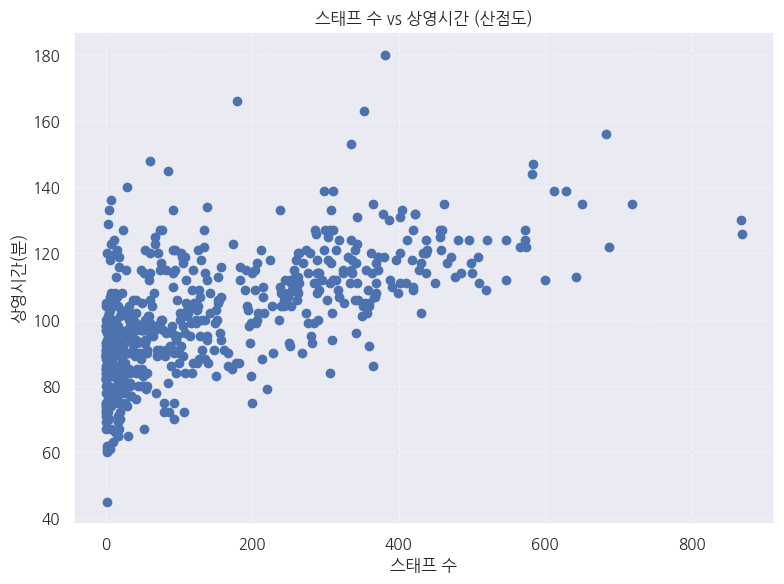

In [27]:
uses = ["num_staff", "time"]

df_use = df[uses].copy()
df_use["num_staff"] = pd.to_numeric(df_use["num_staff"], errors="coerce")
df_use["time"]      = pd.to_numeric(df_use["time"], errors="coerce")
df_use = df_use.dropna(subset=["num_staff", "time"])



plt.figure(figsize=(8, 6))
plt.scatter(
    df_use["num_staff"],
    df_use["time"],
)
plt.title("스태프 수 vs 상영시간 (산점도)")
plt.xlabel("스태프 수")
plt.ylabel("상영시간(분)")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

In [28]:
# 스태프 수와 상영시간의 상관계수

tmp = df_use[['num_staff', 'time']].dropna()
correlation_coefficient = np.corrcoef(tmp['num_staff'].values, tmp['time'].values)[0, 1]

print(f'num_staff와 time 간의 상관계수: {correlation_coefficient}')

num_staff와 time 간의 상관계수: 0.6232051619606054
